In [41]:
import pandas as pd
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras import regularizers

In [42]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv')

In [43]:
train.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [44]:
test.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
1,Donkey Kong Country,SNES,1994.0,Platform,Nintendo,4.36,1.71,3.00,0.23,9.30
2,Halo 2,XB,2004.0,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,8.49
3,Zumba Fitness,Wii,2010.0,Sports,505 Games,3.50,2.64,0.00,0.67,6.81
4,LEGO Star Wars: The Complete Saga,Wii,2007.0,Action,LucasArts,3.66,1.63,0.00,0.53,5.83


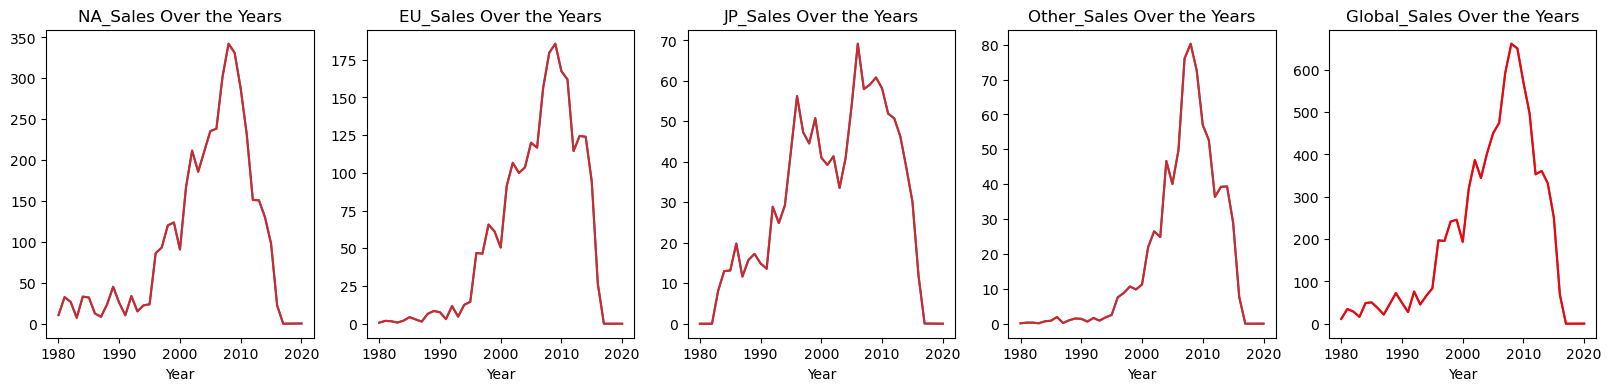

In [45]:
filtered = train.dropna(subset=['Year'])
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
rows = 1
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 4))

for i, col in enumerate(sales_columns):
    yearly_sales = filtered.groupby('Year')[col].sum()
    sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, ax=axes[i])
    axes[i].set_title(f'{col} Over the Years')
    
    color = 'red' if col == 'Global_Sales' else None
    sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, ax=axes[i], color=color)

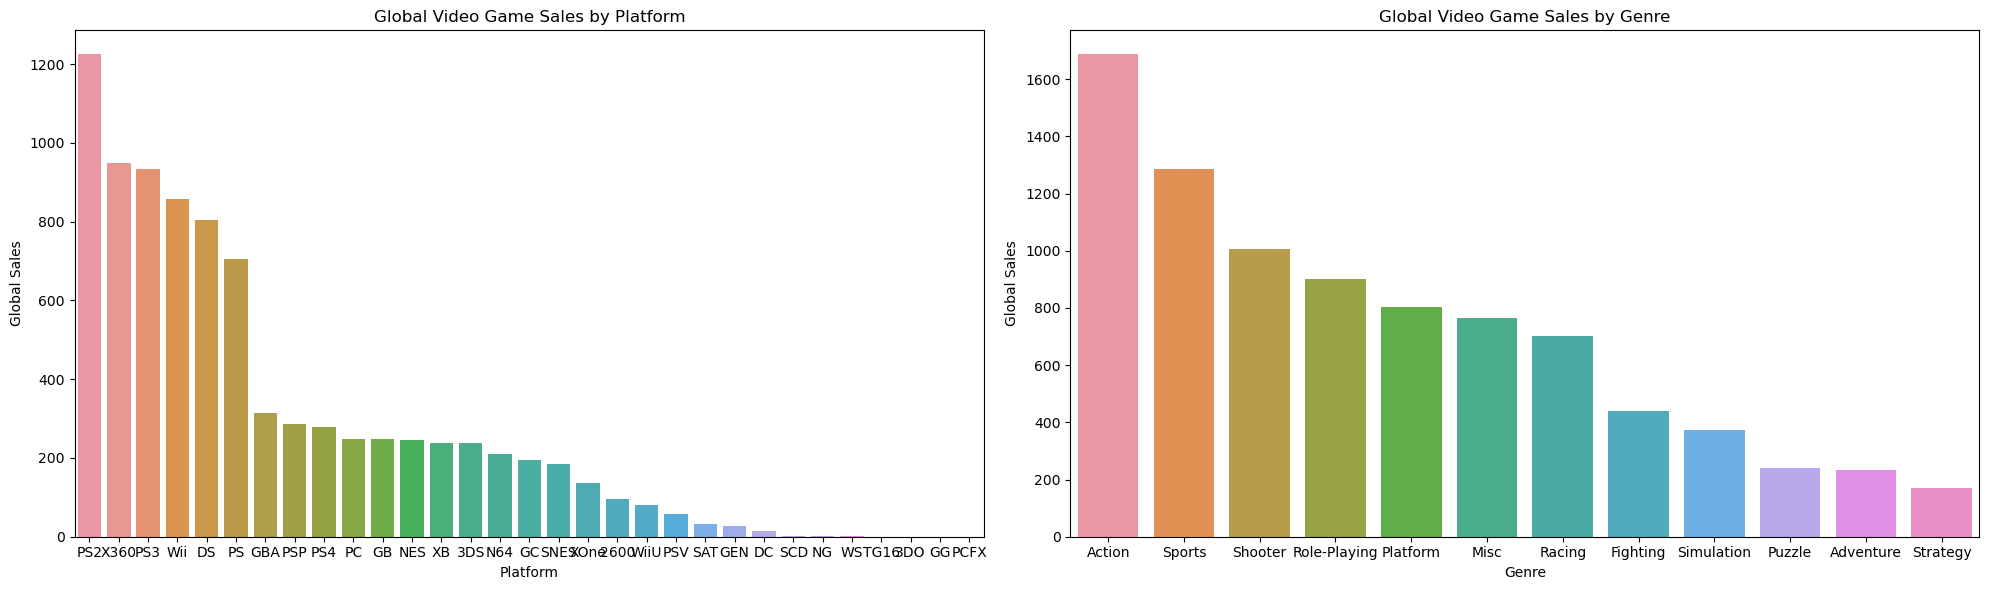

In [46]:
# Grouping the data by platform and summing up the global sales
platform_sales = train.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Grouping the data by genre and summing up the global sales
genre_sales = train.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Creating subplots for platforms and genres
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plotting the sales by platform
sns.barplot(x=platform_sales.index, y=platform_sales.values, ax=ax[0])
ax[0].set_title('Global Video Game Sales by Platform')
ax[0].set_xlabel('Platform')
ax[0].set_ylabel('Global Sales')

# Plotting the sales by genre
sns.barplot(x=genre_sales.index, y=genre_sales.values, ax=ax[1])
ax[1].set_title('Global Video Game Sales by Genre')
ax[1].set_xlabel('Genre')
ax[1].set_ylabel('Global Sales')

plt.tight_layout()
plt.show()

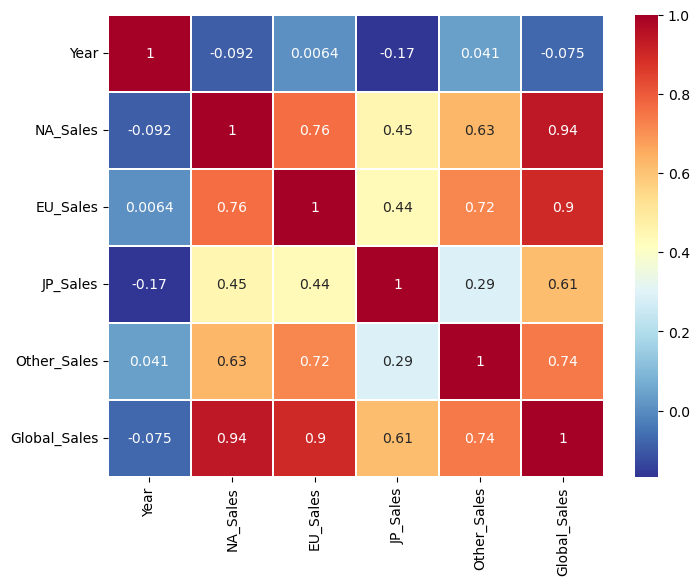

In [47]:
corr_ = train.drop('Rank', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')
plt.show()

# Preprocessing

## Missing Data

In [48]:
# replace with NaN
colume = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
train[colume] = train[colume].replace(0,np.nan)

train = train.dropna(thresh=train.shape[1]-1)
#刪除超過2個NaN的資料

In [49]:
columns_to_drop = ['Name', 'Platform', 'Year', 'Genre', 'Publisher']
# 使用 drop 函數刪除指定特徵列
train = train.drop(columns=columns_to_drop)

In [50]:
from sklearn.impute import SimpleImputer
# fix the remaining missing data
imr = SimpleImputer()
column = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
train[column] = imr.fit_transform(train[colume])

train

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,41.49,29.02,3.770000,8.460000,82.74
1,2,29.08,3.58,6.810000,0.770000,40.24
2,3,15.85,12.88,3.790000,3.310000,35.82
3,4,15.75,11.01,3.280000,2.960000,33.00
4,5,11.27,8.89,10.220000,1.000000,31.37
...,...,...,...,...,...,...
13674,14185,0.02,0.01,0.291363,0.010000,0.03
13676,14187,0.01,0.02,0.291363,0.010000,0.03
13757,14270,0.01,0.02,0.291363,0.010000,0.03
13786,14302,0.01,0.02,0.291363,0.010000,0.03


In [51]:
colume = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
test[colume] = test[colume].replace(0,np.nan)

columns_to_drop = ['Platform', 'Year', 'Genre', 'Publisher']
test = test.drop(columns=columns_to_drop)

imr = SimpleImputer()
column = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
test[column] = imr.fit_transform(test[colume])

test

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Play,14.030000,9.200000,2.930000,2.85000,29.02
1,Donkey Kong Country,4.360000,1.710000,3.000000,0.23000,9.30
2,Halo 2,6.820000,1.530000,0.050000,0.08000,8.49
3,Zumba Fitness,3.500000,2.640000,0.217169,0.67000,6.81
4,LEGO Star Wars: The Complete Saga,3.660000,1.630000,0.217169,0.53000,5.83
...,...,...,...,...,...,...
595,Space Raiders,0.010000,0.208542,0.217169,0.07059,0.01
596,Smart Boy's Winter Wonderland,0.010000,0.208542,0.217169,0.07059,0.01
597,Dramatical Murder Re:code,0.364671,0.208542,0.010000,0.07059,0.01
598,Hanasaku Manimani,0.364671,0.208542,0.010000,0.07059,0.01


## Normalize

In [52]:
from sklearn.preprocessing import MinMaxScaler

train_rank = train['Rank']
test_name = test['Name']

min_max_scaler = MinMaxScaler()

train_sales_scaled = min_max_scaler.fit_transform(train[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
train[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] = train_sales_scaled
train['Rank'] = train_rank

test_sales_scaled = min_max_scaler.fit_transform(test[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
test[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] = test_sales_scaled
test['Name'] = test_name

In [53]:
train

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,1.000000,1.000000,0.368266,0.800189,1.000000
1,2,0.700820,0.123061,0.666014,0.071970,0.486156
2,3,0.381871,0.443640,0.370225,0.312500,0.432717
3,4,0.379460,0.379180,0.320274,0.279356,0.398622
4,5,0.271456,0.306101,1.000000,0.093750,0.378914
...,...,...,...,...,...,...
13674,14185,0.000241,0.000000,0.027558,0.000000,0.000000
13676,14187,0.000000,0.000345,0.027558,0.000000,0.000000
13757,14270,0.000000,0.000345,0.027558,0.000000,0.000000
13786,14302,0.000000,0.000345,0.027558,0.000000,0.000000


In [54]:
test

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Play,1.000000,1.000000,0.976589,1.000000,1.000000
1,Donkey Kong Country,0.310271,0.184984,1.000000,0.077465,0.320234
2,Halo 2,0.485735,0.165397,0.013378,0.024648,0.292313
3,Zumba Fitness,0.248930,0.286181,0.069287,0.232394,0.234402
4,LEGO Star Wars: The Complete Saga,0.260342,0.176279,0.069287,0.183099,0.200620
...,...,...,...,...,...,...
595,Space Raiders,0.000000,0.021604,0.069287,0.021334,0.000000
596,Smart Boy's Winter Wonderland,0.000000,0.021604,0.069287,0.021334,0.000000
597,Dramatical Murder Re:code,0.025298,0.021604,0.000000,0.021334,0.000000
598,Hanasaku Manimani,0.025298,0.021604,0.000000,0.021334,0.000000


# Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [56]:
target_column = 'Rank'
x_reg = train[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y_reg = train[target_column]

# Split the data into training and testing sets
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size=0.076, random_state=45)

regressors = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=2),
    DecisionTreeRegressor(max_depth=4, min_samples_split=3),
    MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=100),
    RandomForestRegressor(max_depth=5, min_samples_split=3),
]

log_reg = []

for reg in regressors:
    reg.fit(x_reg_train, y_reg_train)
    name_reg = reg.__class__.__name__
    print('*' * 30)
    print(name_reg)
    predictions_reg = reg.predict(x_reg_test)
    r2 = r2_score(y_reg_test, predictions_reg)
    print('R-squared: {:.4f}'.format(r2))
    log_reg.append([name_reg, r2])

print('*' * 30)

******************************
LinearRegression
R-squared: 0.1746
******************************
KNeighborsRegressor
R-squared: 0.9915
******************************
DecisionTreeRegressor
R-squared: 0.9047


C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


******************************
MLPRegressor
R-squared: 0.0876
******************************
RandomForestRegressor
R-squared: 0.9482
******************************


# Classification

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# By NA_Sales,EU_Sales

In [58]:
x_cla = train[['NA_Sales', 'EU_Sales']]
y_cla = train['Rank']

k_bins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
y_discretized = k_bins.fit_transform(y_cla.values.reshape(-1, 1)).astype(int)

x_cla_train, x_cla_test, y_cla_train, y_cla_test = train_test_split(x_cla, y_discretized, test_size=0.076, random_state=45)

classifiers = [
    KNeighborsClassifier(4),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=8, min_samples_split=3),
    MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=100),
    RandomForestClassifier(max_depth=8, min_samples_split=3),
]

log = []
for clf in classifiers:
    clf.fit(x_cla_train, y_cla_train)
    name = clf.__class__.__name__
    print('*' * 30)
    print(name)
    predictions = clf.predict(x_cla_test)
    acc = accuracy_score(y_cla_test, predictions)
    print('Accuracy: {:.4%}'.format(acc))
    log.append([name, acc * 100])

print('*' * 30)

C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\venchi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

******************************
KNeighborsClassifier
Accuracy: 82.5000%
******************************
GaussianNB
Accuracy: 75.3333%
******************************
DecisionTreeClassifier
Accuracy: 86.6667%


C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\venchi\AppData\Local\Temp\ipykernel_13248\1056909091.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_cla_train, y_cla_train)


******************************
MLPClassifier
Accuracy: 84.8333%
******************************
RandomForestClassifier
Accuracy: 87.0000%
******************************


# Classfier: RandomForestClassifier

In [64]:
x_rt1_train, x_rt1_test, y_rt1_train, y_rt1_test = train_test_split(x_cla,y_cla,test_size=0.076,random_state=45)
x_rt1_test = test.drop(['Name','JP_Sales','Other_Sales','Global_Sales'],axis=1)
x_rt1_test.head()

,NA_Sales,EU_Sales
0,1.000000,1.000000
1,0.310271,0.184984
2,0.485735,0.165397
3,0.248930,0.286181
4,0.260342,0.176279


In [65]:
from sklearn.ensemble import RandomForestClassifier

RT1 = RandomForestClassifier(max_depth=8,min_samples_split=3)
RT1.fit(x_rt1_train,y_rt1_train)

raw_rt1_predictions = RT1.predict(x_rt1_test)
rt1_predictions = np.round(raw_rt1_predictions).astype(int)

In [66]:
rt1_predictions

array([    1,    19,    16,    15,    24,    13,    25,    13,    47,
          38,    49,    49,    49,    97,   129,    55,    78,    94,
          65,   100,    90,    81,   135,   240,   277,   872,    86,
         872,   452,   301,    91,   452,   128,   194,   226,   242,
         212,   177,   145,  2740,   240,   133,   323,    89,   222,
          89,    82,   294,   199,   263,   241,   815,   872,   385,
         192,   247,   462,   322,   827,   263,  1707,   372,   872,
         872,   872,   462,   377,   364,   550,    48,    48,   440,
         517,   370,   380,   440,   585,   197,   517,   570,   517,
        4926,   320,   585,   794,   291,   476,   303,   317,   900,
         291,  1732,   263,   839,   872,   291,   536,   723,   722,
         628,   652,   835,  2391,   799,  2191,   969,   588,   858,
        1441,   835,  2420,   778,   872,   414,  1546,   900,   705,
        1190,   705,  6260,   929,  1051,  1105,   889,   872,  1105,
         997,   872,

In [67]:
output = pd.DataFrame({'Name':test.Name,'Rank':rt1_predictions})
output.to_csv('test_submission_1.csv', index=False)

# Prediction score

In [95]:
x = train[['NA_Sales', 'EU_Sales']]
y = train['Rank']
x_rt1_train, x_rt1_test, y_rt1_train, y_rt1_test = train_test_split(x,y,test_size=0.076,random_state=45)

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_rt1_test, raw_rt1_predictions)
rse = np.sqrt(mse) / np.std(y_rt1_test)
print(f'RSE: {rse:.4f}')

r2 = r2_score(y_rt1_test, raw_rt1_predictions)
print(f'R-squared: {r2:.4f}')

RSE: 1.4468
R-squared: -1.0933


# By NA_Sales,EU_Sales,Other_Sales

In [72]:
x_cla = train[['NA_Sales', 'EU_Sales', 'Other_Sales']]
y_cla = train['Rank']

k_bins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
y_discretized = k_bins.fit_transform(y_cla.values.reshape(-1, 1)).astype(int)

x_cla_train, x_cla_test, y_cla_train, y_cla_test = train_test_split(x_cla, y_discretized, test_size=0.076, random_state=45)

classifiers = [
    KNeighborsClassifier(4),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=8, min_samples_split=3),
    MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=100),
    RandomForestClassifier(max_depth=8, min_samples_split=3),
]

log = []
for clf in classifiers:
    clf.fit(x_cla_train, y_cla_train)
    name = clf.__class__.__name__
    print('*' * 30)
    print(name)
    predictions = clf.predict(x_cla_test)
    acc = accuracy_score(y_cla_test, predictions)
    print('Accuracy: {:.4%}'.format(acc))
    log.append([name, acc * 100])

print('*' * 30)

C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\venchi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

******************************
KNeighborsClassifier
Accuracy: 87.8333%
******************************
GaussianNB
Accuracy: 74.8333%
******************************
DecisionTreeClassifier
Accuracy: 86.3333%


C:\Users\venchi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\venchi\AppData\Local\Temp\ipykernel_13248\1592630072.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_cla_train, y_cla_train)


******************************
MLPClassifier
Accuracy: 86.6667%
******************************
RandomForestClassifier
Accuracy: 88.1667%
******************************


# Classfier: RandomForestClassifier

In [82]:
x_cla = train[['EU_Sales', 'Other_Sales']]
y_cla = train['Rank']
x_rt2_train, x_rt2_test, y_rt2_train, y_rt2_test = train_test_split(x_cla,y_cla,test_size=0.076,random_state=45)
x_rt2_test = test.drop(['Name','NA_Sales','JP_Sales','Global_Sales'],axis=1)
x_rt2_test.head()

,EU_Sales,Other_Sales
0,1.000000,1.000000
1,0.184984,0.077465
2,0.165397,0.024648
3,0.286181,0.232394
4,0.176279,0.183099


In [83]:
RT2 = RandomForestClassifier(max_depth=8,min_samples_split=3)
RT2.fit(x_rt2_train,y_rt2_train)
raw_rt2_predictions = RT2.predict(x_rt2_test)
rt2_predictions = np.round(raw_rt2_predictions).astype(int)

In [84]:
rt2_predictions

array([    1,    28,    47,    14,    83,    78,    35,     9,   257,
          38,    57,    39,    44,  1086,   115,    55,    38,    94,
           2,   505,   315,   393,   205,  1037,   832,  2413,    26,
         932,  1297,   362,   190,   841,   327,   242,   481,   337,
         680,   141,   273,  1329,  2525,   350,    29,   424,   200,
         424,    75,   337,   417,   512,   683,   490,   932,   623,
         776,  1928,   554,   322,   674,   368,  2125,   551,   932,
         932,  1186,   907,   345,   799,   448,  3719,  4529,   536,
        3136,  2303,   728,   440,   841,   547,   607,   490,  3719,
       12362,  1830,   616,   833,  3136,   446,   759,   547,   554,
        3136,   988,   547,   315,   932,  1260,   322,   411,   411,
         256,  2625,   315,  2148,   128,  2465,   634,    10,  1427,
        6227,   358,   468,  1881,   932,   386,  2525,   529,  1438,
        2651,  1316,  5457,   277,   833,   680,  1110,  1044,  1385,
         520,   932,

In [85]:
output = pd.DataFrame({'Name':test.Name,'Rank':rt2_predictions})
output.to_csv('test_submission_2.csv', index=False)

In [88]:
x_cla = train[['NA_Sales', 'Other_Sales']]
y_cla = train['Rank']
x_rt3_train, x_rt3_test, y_rt3_train, y_rt3_test = train_test_split(x_cla,y_cla,test_size=0.076,random_state=45)
x_rt3_test = test.drop(['Name','EU_Sales','JP_Sales','Global_Sales'],axis=1)
x_rt3_test.head()

,NA_Sales,Other_Sales
0,1.000000,1.000000
1,0.310271,0.077465
2,0.485735,0.024648
3,0.248930,0.232394
4,0.260342,0.183099


In [89]:
RT3 = RandomForestClassifier(max_depth=8,min_samples_split=3)
RT3.fit(x_rt3_train,y_rt3_train)
raw_rt3_predictions = RT3.predict(x_rt3_test)
rt3_predictions = np.round(raw_rt3_predictions).astype(int)

In [90]:
rt3_predictions

array([    1,     5,    10,    12,    12,    14,    17,    34,    63,
          25,    21,    38,    44,   144,    40,    55,   125,    68,
         280,   144,   134,    46,    96,    71,   354,  1819,   184,
         988,   137,   249,   311,   288,    43,   146,   177,   161,
          96,   177,   315,  2849,   137,   404,   199,   214,  1428,
         172,   341,   123,   628,   137,   146,   606,   988,   137,
         137,   259,   300,   364,   560,   368,  1472,   412,   988,
         988,   741,   366,   345,   364,   362,  1022,   146,   484,
          42,    90,   412,   490,   320,   728,   183,   492,  1022,
        5377,   382,  1022,   741,   307,   446,   642,   728,   186,
         307,   584,   728,   296,   988,   171,  1233,   741,   741,
         360,   829,   593,  1596,  2246,  1316,   335,   481,   674,
         892,   439,  1004,   892,   988,   969,  1348,   367,  1035,
        1133,  1210,  3345,   929,  1254,  1285,   884,  1601,  1035,
        1348,   988,

In [91]:
output = pd.DataFrame({'Name':test.Name,'Rank':rt3_predictions})
output.to_csv('test_submission_3.csv', index=False)

# Merge

In [92]:
average_result = np.mean([rt1_predictions, rt2_predictions, rt3_predictions], axis=0)
final_predictions = np.round(average_result).astype(int)

ooutput = pd.DataFrame({'Name':test.Name,'Rank':final_predictions})
output.to_csv('final_predictions.csv', index=False)

# Prediction score

In [97]:
x = train[['NA_Sales', 'EU_Sales', 'Other_Sales']]
y = train['Rank']
x_rt_train, x_rt_test, y_rt_train, y_rt_test = train_test_split(x,y,test_size=0.076,random_state=45)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_rt_test, final_predictions)
rse = np.sqrt(mse) / np.std(y_rt_test)
print(f'RSE: {rse:.4f}')

r2 = r2_score(y_rt_test, final_predictions)
print(f'R-squared: {r2:.4f}')

RSE: 1.3947
R-squared: -0.9451
